In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the PostgreSQL database URL using environment variable
db_url = "" # URL hidden for security reasons

# Create a PostgreSQL engine using the URL
engine = create_engine(db_url)

In [3]:
# Load CSV data into PostgreSQL
def load_csv_to_postgres(csv_file, table_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Write the DataFrame to the PostgreSQL database
    df.to_sql(table_name, engine, if_exists='replace', index=False)

In [4]:
# Function to execute SQL queries
def execute_query(query, **kwargs):
    # Establish a connection to the PostgreSQL database
    connection = engine.connect()

    try:
        # Execute the SQL query and fetch the result into a DataFrame
        result = pd.read_sql(query, connection, params=kwargs)
    finally:
        # Close the database connection
        connection.close()

    return result

In [5]:
# Load CSV data into PostgreSQL
csv_file = "World_Energy_Consumption.csv"
table_name = "World_Energy_Consumption"

In [6]:
# load_csv_to_postgres(csv_file, table_name)

In [7]:
# Define the query parameters 
country = "World"

# Define the SQL query
query1 = text(f'''WITH Top5Renewables AS (
                SELECT DISTINCT ON (country) country, year, renewables_share_energy
                FROM "public"."{table_name}"
                WHERE country != :country AND renewables_share_energy IS NOT NULL
                ORDER BY country, renewables_share_energy DESC
            )
            SELECT country, renewables_share_energy, year AS peak_year, 2020 - year AS years_ago
            FROM Top5Renewables
            ORDER BY renewables_share_energy DESC;''')
query1 = query1.bindparams(country=country)

# Execute the SQL query
result_q1 = execute_query(query1)

# Save the result to a CSV file
result_q1.to_csv('result_query1.txt', sep='\t', index=False)

# Print the result
display(result_q1)

,country,renewables_share_energy,peak_year,years_ago
0,Iceland,82.835,2012,8
1,Norway,71.180,1990,30
2,New Zealand,45.595,1981,39
3,Brazil,45.017,2019,1
4,Sweden,44.850,2015,5
...,...,...,...,...
77,Kuwait,0.087,2019,1
78,Hong Kong,0.084,2014,6
79,Qatar,0.077,2011,9
80,Turkmenistan,0.012,1997,23


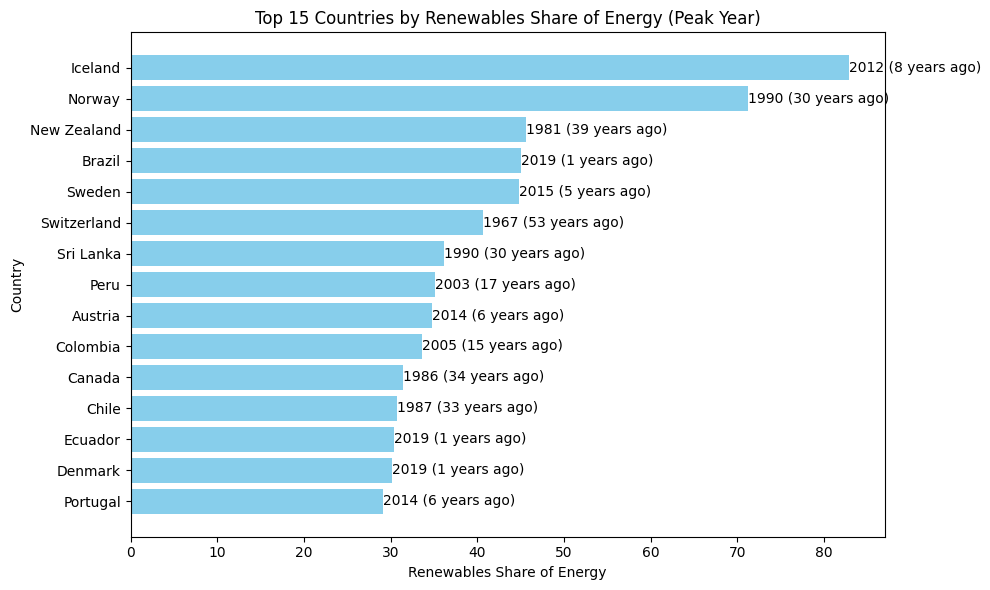

In [8]:
# Sort the DataFrame by 'renewables_share_energy' in descending order
result_q1 = result_q1.sort_values(by='renewables_share_energy', ascending=False)

# Define the number of top countries to visualize
top_n = 15

# Select the top 'top_n' countries
top_countries = result_q1.iloc[:top_n]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_countries['country'], top_countries['renewables_share_energy'], color='skyblue')
plt.xlabel('Renewables Share of Energy')
plt.ylabel('Country')
plt.title(f'Top {top_n} Countries by Renewables Share of Energy (Peak Year)')
plt.gca().invert_yaxis()  # Reverse the order to show the highest value at the top

# Display the peak years as text on the bars
for i, row in top_countries.iterrows():
    plt.text(row['renewables_share_energy'], i, f'{row["peak_year"]} ({row["years_ago"]} years ago)', va='center', fontsize=10)

plt.tight_layout()
plt.show()

🇨🇦 Canada's renewable energy share in the total energy mix stands at 31.42%. This figure peaked in 1986, 34 years ago (from 2020). Despite the passage of time, Canada continues to demonstrate a commitment to renewable energy sources, as it maintains a significant share in its energy portfolio. However, this data shows that Canada still have a role to play in the transition towards cleaner and more sustainable energy solutions. 🍁🌿

In [9]:
# Define the query parameters 
country = "World"

# Define the SQL query
query2 = text(f'''WITH Top5Renewables AS (
                SELECT DISTINCT ON (country) country, year, renewables_share_elec
                FROM "public"."{table_name}"
                WHERE country != :country AND renewables_share_elec IS NOT NULL
                ORDER BY country, renewables_share_elec DESC
            )
            SELECT country, renewables_share_elec, year AS peak_year, 2020 - year AS years_ago
            FROM Top5Renewables
            ORDER BY renewables_share_elec DESC;''')
query2 = query2.bindparams(country=country)

# Execute the SQL query
result_q2 = execute_query(query2)

# Save the result to a CSV file
result_q2.to_csv('result_query2.txt', sep='\t', index=False)

# Print the result
display(result_q2)

,country,renewables_share_elec,peak_year,years_ago
0,Congo,100.0,2001,19
1,Bhutan,100.0,2014,6
2,Albania,100.0,2018,2
3,Nepal,100.0,2019,1
4,Rwanda,100.0,2004,16
...,...,...,...,...
222,Montserrat,0.0,2000,20
223,Saint Helena,0.0,2012,8
224,Bermuda,0.0,2009,11
225,Western Sahara,0.0,2000,20


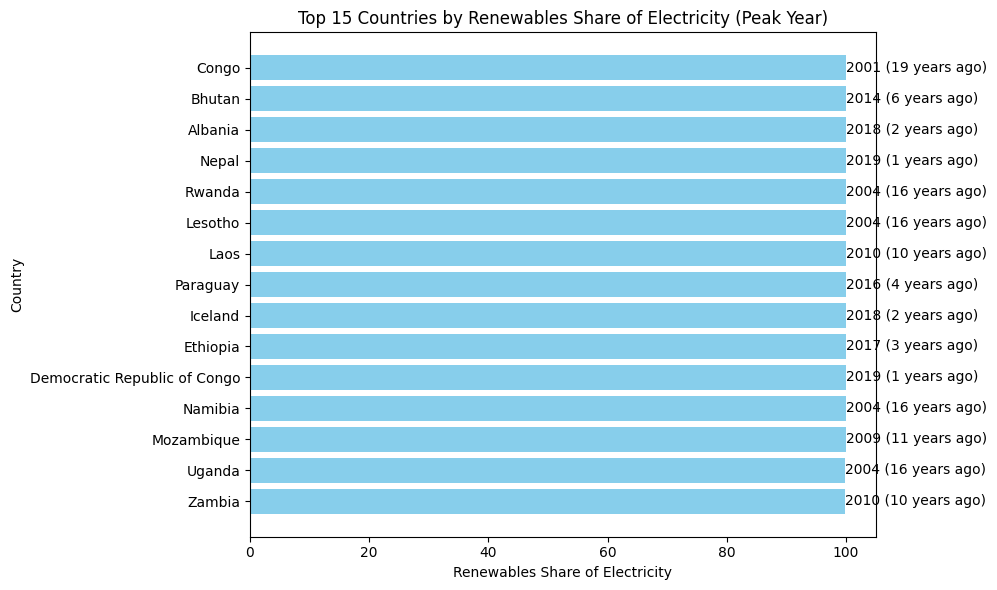

In [10]:
# Sort the DataFrame by 'renewables_share_elec' in descending order
result_q2 = result_q2.sort_values(by='renewables_share_elec', ascending=False)

# Define the number of top countries to visualize
top_n = 15

# Select the top 'top_n' countries
top_countries = result_q2.iloc[:top_n]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_countries['country'], top_countries['renewables_share_elec'], color='skyblue')
plt.xlabel('Renewables Share of Electricity')
plt.ylabel('Country')
plt.title(f'Top {top_n} Countries by Renewables Share of Electricity (Peak Year)')
plt.gca().invert_yaxis()  # Reverse the order to show the highest value at the top

# Display the peak years as text on the bars
for i, row in top_countries.iterrows():
    plt.text(row['renewables_share_elec'], i, f'{row["peak_year"]} ({row["years_ago"]} years ago)', va='center', fontsize=10)

plt.tight_layout()
plt.show()

🇨🇦 Canada's renewable electricity share is at 68.52%, which was reported in 2020. While Canada ranks quite high in terms of renewable electricity share, it's not in the top 15 for electricity as a percentage of total energy consumption. Nonetheless, Canada's high renewable electricity share indicates a commitment to clean energy, and the country continues to invest in renewable energy projects to reduce its carbon footprint and promote sustainability in its energy sector. 🍁🌿

In [11]:
# Define the query parameters 
country = "Canada"

# Define the SQL query
query3 = text(f'''SELECT t1.year, t1.country, t1.renewables_share_energy, world_avg.renewables_share_energy AS world_avg_renewables_share_energy
            FROM "public"."{table_name}" as t1
            JOIN (
                SELECT year, AVG(renewables_share_energy) AS renewables_share_energy
                FROM "public"."{table_name}"
                WHERE country != :country
                GROUP BY year
            ) AS world_avg ON t1.year = world_avg.year
            WHERE t1.country = :country
            ORDER BY t1.year;''')
query3 = query3.bindparams(country=country)

# Execute the SQL query
result_q3 = execute_query(query3)

# Save the result to a CSV file
result_q3.to_csv('result_query3.txt', sep='\t', index=False)

# Print the result
display(result_q3)

,year,country,renewables_share_energy,world_avg_renewables_share_energy
0,1900,Canada,NaN,NaN
1,1901,Canada,NaN,NaN
2,1902,Canada,NaN,NaN
3,1903,Canada,NaN,NaN
4,1904,Canada,NaN,NaN
...,...,...,...,...
116,2016,Canada,28.541,11.911402
117,2017,Canada,28.657,12.110890
118,2018,Canada,27.569,12.540061
119,2019,Canada,27.638,12.779756


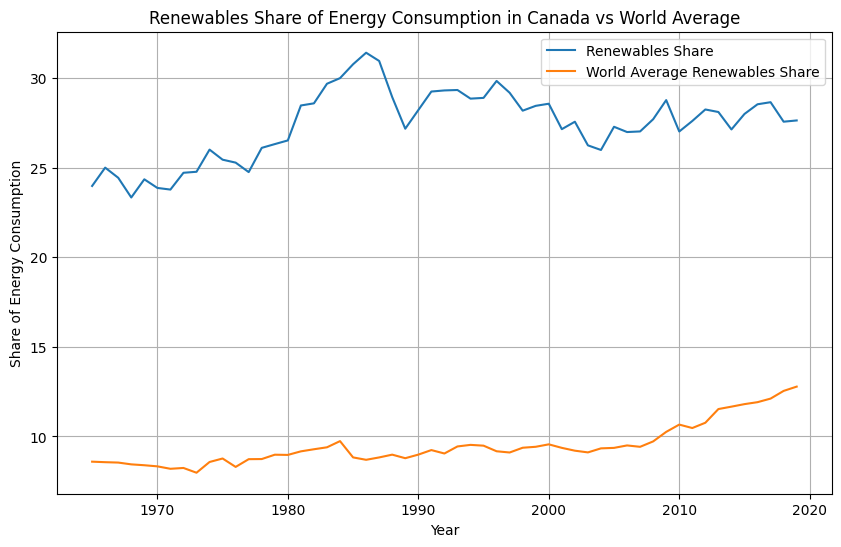

In [12]:
# Create a two line plot comparing the share of renewables energy consumption in Canada vs the world average
plt.figure(figsize=(10, 6))
plt.plot(result_q3['year'], result_q3['renewables_share_energy'], label='Renewables Share')
plt.plot(result_q3['year'], result_q3['world_avg_renewables_share_energy'], label='World Average Renewables Share')
plt.xlabel('Year')
plt.ylabel('Share of Energy Consumption')
plt.title('Renewables Share of Energy Consumption in Canada vs World Average')
plt.legend()
plt.grid(True)
plt.show()

🇨🇦 Canada's renewable energy share peaked at 31.42% in 1986. This shows a commitment to cleaner energy sources. However, while Canada is in the top 15 for renewable energy consumption, it needs to continue to invest in renewables for a greener future. 🍁🌿

In [13]:
# Define the query parameters 
country = "Canada"

# Define the SQL query
query4 = text(f'''SELECT t1.year, t1.country, t1.renewables_share_elec, world_avg.renewables_share_elec AS world_avg_renewables_share_elec
            FROM "public"."{table_name}" as t1
            JOIN (
                SELECT year, AVG(renewables_share_elec) AS renewables_share_elec
                FROM "public"."{table_name}"
                WHERE country != :country
                GROUP BY year
            ) AS world_avg ON t1.year = world_avg.year
            WHERE t1.country = :country
            ORDER BY t1.year;''')
query4 = query4.bindparams(country=country)

# Execute the SQL query
result_q4 = execute_query(query4)

# Save the result to a CSV file
result_q4.to_csv('result_query4.txt', sep='\t', index=False)

# Print the result
display(result_q4)

,year,country,renewables_share_elec,world_avg_renewables_share_elec
0,1900,Canada,NaN,NaN
1,1901,Canada,NaN,NaN
2,1902,Canada,NaN,NaN
3,1903,Canada,NaN,NaN
4,1904,Canada,NaN,NaN
...,...,...,...,...
116,2016,Canada,65.985,31.475624
117,2017,Canada,67.743,31.804257
118,2018,Canada,67.420,32.861575
119,2019,Canada,67.018,33.232199


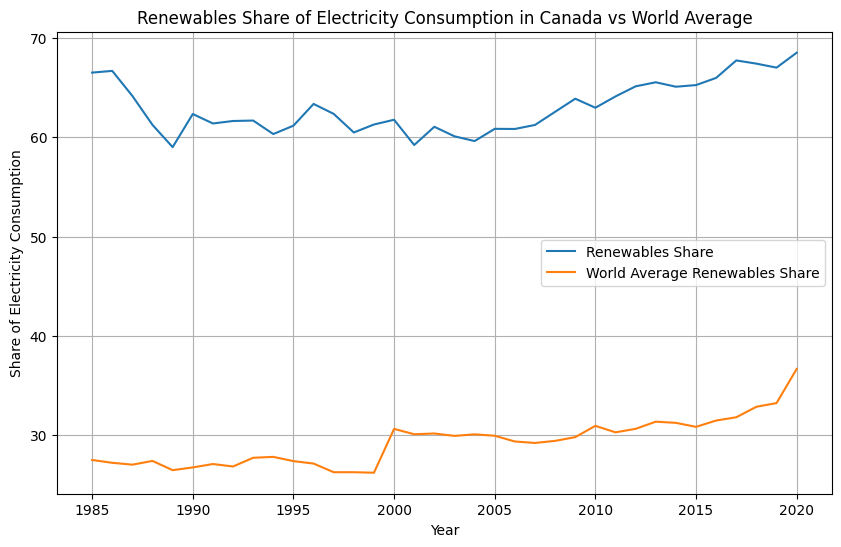

In [14]:
# Create a two line plot comparing the share of renewables electricity consumption in Canada vs the world average
plt.figure(figsize=(10, 6))
plt.plot(result_q4['year'], result_q4['renewables_share_elec'], label='Renewables Share')
plt.plot(result_q4['year'], result_q4['world_avg_renewables_share_elec'], label='World Average Renewables Share')
plt.xlabel('Year')
plt.ylabel('Share of Electricity Consumption')
plt.title('Renewables Share of Electricity Consumption in Canada vs World Average')
plt.legend()
plt.grid(True)
plt.show()

📊 Key Findings: The data, starting from 1985, offers insights into Canada's evolving energy landscape. In the mid-1980s, Canada's share of renewables in electricity generation stood at 66.52%, significantly exceeding the world average of 27.5%. Over the years, Canada has consistently maintained a robust commitment to renewable energy, with the share of renewables in 2020 reaching an impressive 68.52%, far surpassing the global average. This steady growth underscores Canada's dedication to sustainable energy sources. 🇨🇦🌿

In [15]:
# Define the query parameters 
country = "Canada"

# Define the SQL query
query5 = text(f'''SELECT year, renewables_share_elec, low_carbon_share_elec 
            FROM "public"."{table_name}"
            WHERE country = :country
            ORDER BY year;''')
query5 = query5.bindparams(country=country)

# Execute the SQL query
result_q5 = execute_query(query5)

# Save the result to a CSV file
result_q5.to_csv('result_query5.txt', sep='\t', index=False)

# Print the result
display(result_q5)

,year,renewables_share_elec,low_carbon_share_elec
0,1900,NaN,NaN
1,1901,NaN,NaN
2,1902,NaN,NaN
3,1903,NaN,NaN
4,1904,NaN,NaN
...,...,...,...
116,2016,65.985,80.795
117,2017,67.743,82.487
118,2018,67.420,82.334
119,2019,67.018,82.017


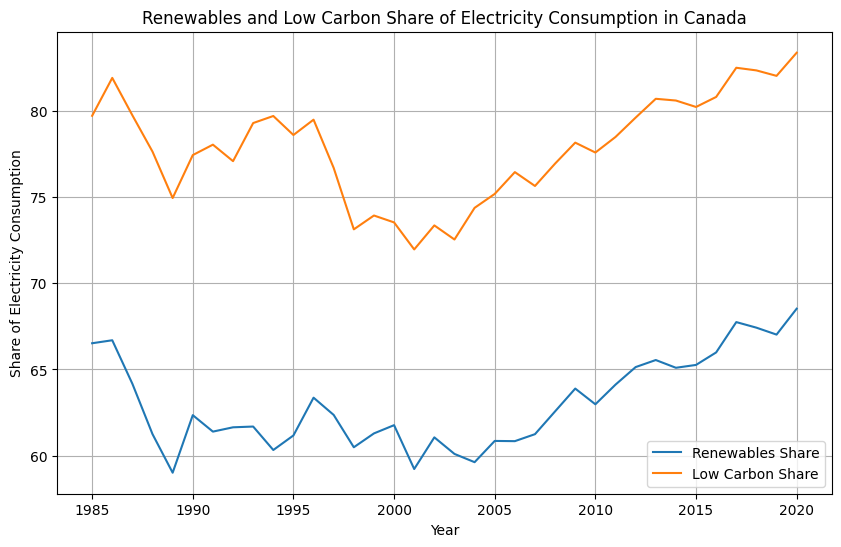

In [16]:
# Create a two line plot comparing the share of renewables and low carbon energy in Canada
plt.figure(figsize=(10, 6))
plt.plot(result_q5['year'], result_q5['renewables_share_elec'], label='Renewables Share')
plt.plot(result_q5['year'], result_q5['low_carbon_share_elec'], label='Low Carbon Share')
plt.xlabel('Year')
plt.ylabel('Share of Electricity Consumption')
plt.title('Renewables and Low Carbon Share of Electricity Consumption in Canada')
plt.legend()
plt.grid(True)
plt.show()

📊 Key Findings: The historical data, captured since 1985, highlights a compelling transformation in the global energy landscape. At the outset of this dataset, renewable and low-carbon energy sources had minimal representation. However, by 2020, a remarkable shift had occurred. Renewable energy's contribution to electricity generation had risen to 68.52%, marking significant progress over this period. Similarly, low-carbon energy sources accounted for 83.36% of electricity generation, reflecting a substantial transition toward cleaner and more sustainable energy options. These trends signify substantial progress in reducing carbon emissions and advancing toward a greener and more environmentally friendly future. 🌍🌱

In [17]:
# Define the query parameters 
country = "Canada"

# Define the SQL query
query6 = text(f'''SELECT year, renewables_electricity, ((renewables_electricity - lag_renewables) / lag_renewables) * 100 AS annual_growth_rate
            FROM (
                SELECT year, renewables_electricity, LAG(renewables_electricity) OVER (ORDER BY year) AS lag_renewables
                FROM "public"."{table_name}"
                WHERE country = :country
            ) AS subquery
            WHERE year IS NOT NULL;''')
query6 = query6.bindparams(country=country)

# Execute the SQL query
result_q6 = execute_query(query6)

# Save the result to a CSV file
result_q6.to_csv('result_query6.txt', sep='\t', index=False)

# Print the result
display(result_q6)

,year,renewables_electricity,annual_growth_rate
0,1900,NaN,NaN
1,1901,NaN,NaN
2,1902,NaN,NaN
3,1903,NaN,NaN
4,1904,NaN,NaN
...,...,...,...
116,2016,426.154,2.112192
117,2017,437.096,2.567616
118,2018,429.615,-1.711523
119,2019,423.820,-1.348882


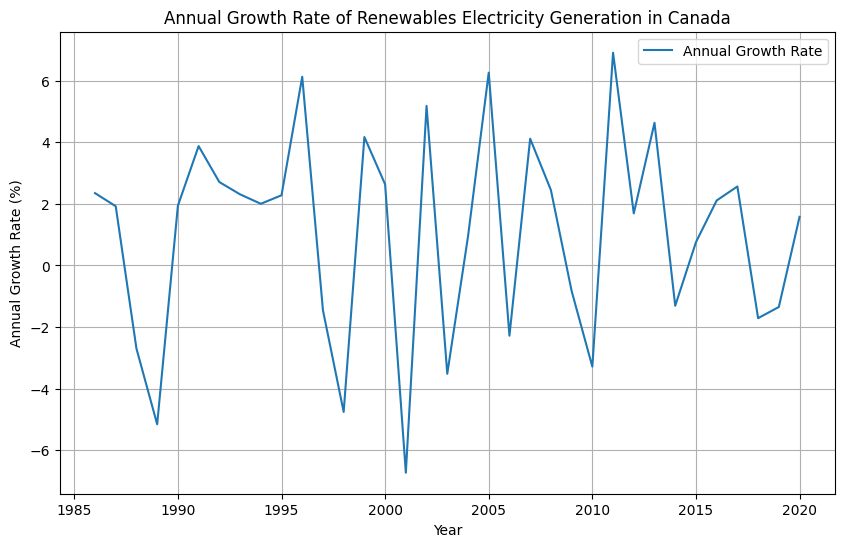

In [18]:
# Create a line plot for the annual growth rate of renewables electricity generation in Canada
plt.figure(figsize=(10, 6))
plt.plot(result_q6['year'], result_q6['annual_growth_rate'], label='Annual Growth Rate')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of Renewables Electricity Generation in Canada')
plt.legend()
plt.grid(True)
plt.show()

📊 Key Findings: The data sheds light on the growth of renewable electricity generation and its annual growth rate. In 1985, renewable electricity generation in the dataset was 305.32 units, and it has steadily increased over the years. Notably, from 1996 onwards, there has been a remarkable upward trend, with renewable electricity generation reaching 430.52 units in 2020. The annual growth rate of renewable electricity generation has fluctuated but generally remained positive, highlighting a consistent commitment to sustainable energy sources. This data underscores the increasing importance of renewables in the energy landscape. 🌱📈 

In [19]:
# Define the query parameters 
country = "Canada"

# Define the SQL query
query7 = text(f'''SELECT year, low_carbon_electricity, ((low_carbon_electricity - lag_low_carbon) / lag_low_carbon) * 100 AS annual_growth_rate
            FROM (
                SELECT year, low_carbon_electricity, LAG(low_carbon_electricity) OVER (ORDER BY year) AS lag_low_carbon
                FROM "public"."{table_name}"
                WHERE country = :country
            ) AS subquery
            WHERE year IS NOT NULL;''')
query7 = query7.bindparams(country=country)

# Execute the SQL query
result_q7 = execute_query(query7)

# Save the result to a CSV file
result_q7.to_csv('result_query7.txt', sep='\t', index=False)

# Print the result
display(result_q7)

,year,low_carbon_electricity,annual_growth_rate
0,1900,NaN,NaN
1,1901,NaN,NaN
2,1902,NaN,NaN
3,1903,NaN,NaN
4,1904,NaN,NaN
...,...,...,...
116,2016,521.804,1.720938
117,2017,532.227,1.997493
118,2018,524.652,-1.423265
119,2019,518.674,-1.139422


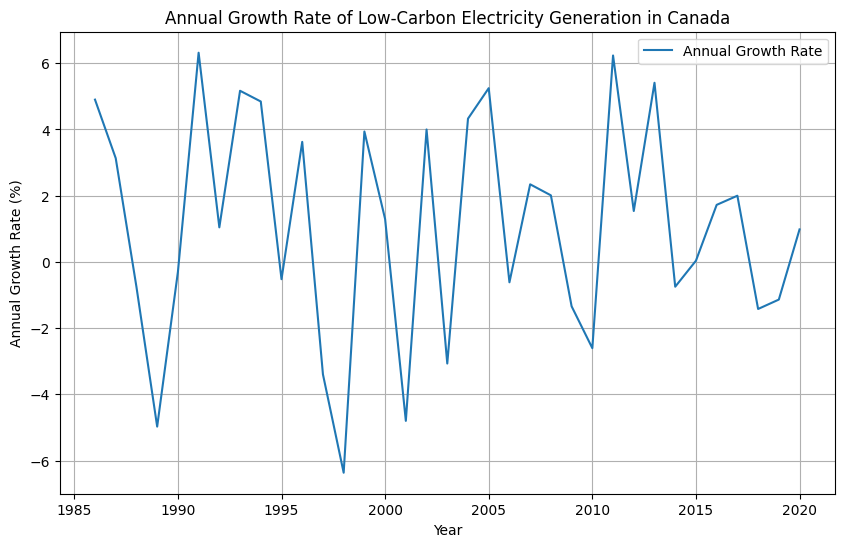

In [20]:
# Create a line plot for the annual growth rate of low-carbon electricity generation in Canada
plt.figure(figsize=(10, 6))
plt.plot(result_q7['year'], result_q7['annual_growth_rate'], label='Annual Growth Rate')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of Low-Carbon Electricity Generation in Canada')
plt.legend()
plt.grid(True)
plt.show()

📊 Key Findings: The data, initiating in 1985, provides insights into the growth of low-carbon electricity generation and its annual growth rate. In the first year, low-carbon electricity generation was at 365.84 units, with subsequent years witnessing consistent growth. Notably, from 1996 onwards, there was a significant upward trend, with low-carbon electricity generation reaching 523.76 units in 2020. Much like the previous data on 'Renewables', the annual growth rate of low-carbon electricity generation exhibited fluctuations but generally remained positive, reflecting a commitment to cleaner and more environmentally friendly energy sources. This data signifies progress towards a more sustainable energy mix. 🌿🔌

In [21]:
# Define the query parameters 
country = "Canada"

# Define the SQL query
query8 = text(f'''WITH EnergyShares AS (
                SELECT year, renewables_electricity AS renewables, fossil_electricity AS fossil_fuels
                FROM "public"."{table_name}"
                WHERE country = :country
            )
            SELECT year, renewables, fossil_fuels,
            (renewables / (renewables + fossil_fuels)) * 100 AS renewables_percentage,
            (fossil_fuels / (renewables + fossil_fuels)) * 100 AS fossil_fuels_percentage
            FROM EnergyShares
            ORDER BY year;''')
query8 = query8.bindparams(country=country)

# Execute the SQL query
result_q8 = execute_query(query8)

# Save the result to a CSV file
result_q8.to_csv('result_query8.txt', sep='\t', index=False)

# Print the result
display(result_q8)


,year,renewables,fossil_fuels,renewables_percentage,fossil_fuels_percentage
0,1900,NaN,NaN,NaN,NaN
1,1901,NaN,NaN,NaN,NaN
2,1902,NaN,NaN,NaN,NaN
3,1903,NaN,NaN,NaN,NaN
4,1904,NaN,NaN,NaN,NaN
...,...,...,...,...,...
116,2016,426.154,124.034,77.456070,22.543930
117,2017,437.096,112.996,79.458709,20.541291
118,2018,429.615,112.569,79.237860,20.762140
119,2019,423.820,113.727,78.843338,21.156662


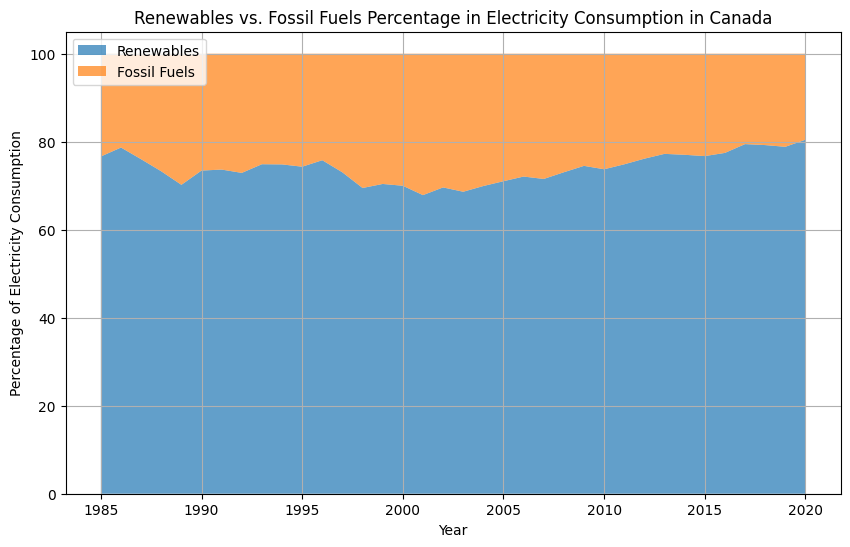

In [22]:
# Create a stacked area plot to visualize the percentage of electricity consumption in Canada from renewables and fossil fuels over the years
plt.figure(figsize=(10, 6))
plt.stackplot(result_q8['year'], result_q8['renewables_percentage'], result_q8['fossil_fuels_percentage'], labels=['Renewables', 'Fossil Fuels'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Percentage of Electricity Consumption')
plt.title('Renewables vs. Fossil Fuels Percentage in Electricity Consumption in Canada')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


📊 Key Findings: The dataset offers valuable insights into the composition of electricity sources. In 1985, renewables constituted 76.65% of electricity generation in contrast to fossil fuels at 23.35%. Over the subsequent years, renewables maintained a steady presence, accounting for 80.46% of electricity generation in 2020, while fossil fuels decreased to 19.54%. This data reflects a notable shift towards cleaner and more sustainable energy sources in the electricity generation mix, aligning with global efforts to reduce carbon emissions. 🌿🔌